In [1]:
#Load all libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from polars import count

In [2]:
#Load dataset into df
df = pd.read_csv('recruitmentdataset-2022-1.3.csv')
#We are group 1 so Company A -> Cut out all data not company A
is_company_A = df['company'] == 'A'
df_A = df[is_company_A]

**Start Of The One hot Encoding Steps**

In [3]:
# one hot encoding to convert 'ind-degree' to numerical data
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df_A[['ind-degree']])
# and add three new columns to the dataset
df_A[ohe.categories_[0]] = transformed.toarray()
# one hot encoding to convert 'gender' to numerical data
transformed = ohe.fit_transform(df_A[['gender']])
# and add three new columns to the dataset
df_A[ohe.categories_[0]] = transformed.toarray()
# one hot encoding to convert 'nationality' to numerical data
transformed = ohe.fit_transform(df_A[['nationality']])
# and add three new columns to the dataset
df_A[ohe.categories_[0]] = transformed.toarray()
# one hot encoding to convert 'sport' to numerical data
transformed = ohe.fit_transform(df_A[['sport']])
# and add seven new columns to the dataset
df_A[ohe.categories_[0]] = transformed.toarray()

C:\Users\taher\AppData\Local\Temp\ipykernel_10112\1178553710.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_A[ohe.categories_[0]] = transformed.toarray()
C:\Users\taher\AppData\Local\Temp\ipykernel_10112\1178553710.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_A[ohe.categories_[0]] = transformed.toarray()
C:\Users\taher\AppData\Local\Temp\ipykernel_10112\1178553710.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

**Start Of The Data Tranformation/Normalization Steps**

In [4]:
# Make a copy from the original dataset as to not overwrite data
df_A_new = df_A.copy()
# Turn the 'decision' column to nuremic values (0 and 1)
df_A_new['decision'] = df_A_new['decision'].astype(int)
# Turn the 'ind-programming_exp' column to nuremic values (0 and 1)
df_A_new['ind-programming_exp'] = df_A_new['ind-programming_exp'].astype(int)
# Turn the 'ind-international_exp' column to nuremic values (0 and 1)
df_A_new['ind-international_exp'] = df_A_new['ind-international_exp'].astype(int)
# Turn the 'ind-entrepeneur_exp' column to nuremic values (0 and 1)
df_A_new['ind-entrepeneur_exp'] = df_A_new['ind-entrepeneur_exp'].astype(int)
# Turn the 'ind-exact_study' column to nuremic values (0 and 1)
df_A_new['ind-exact_study'] = df_A_new['ind-exact_study'].astype(int)
# Turn the 'ind-debateclub' column to nuremic values (0 and 1)
df_A_new['ind-debateclub'] = df_A_new['ind-debateclub'].astype(int)
# Noramlize the 'ind-languages' column to a nuremic value (between 0 and 1)
df_A_new['ind-languages'] = (df_A_new['ind-languages']-df_A_new['ind-languages'] .min())/(df_A_new['ind-languages'] .max()-df_A_new['ind-languages'] .min())
# Noramlize the 'ind-university_grade' column to a nuremic value (between 0 and 1)
df_A_new['ind-university_grade'] = (df_A_new['ind-university_grade']-df_A_new['ind-university_grade'] .min())/(df_A_new['ind-university_grade'] .max()-df_A_new['ind-university_grade'] .min())
# Noramlize the 'ind-age' column to a nuremic value (between 0 and 1)
df_A_new['age'] = (df_A_new['age']-df_A_new['age'] .min())/(df_A_new['age'] .max()-df_A_new['age'] .min())
# Create a new dataset with only the indicators and the 'decision' column to create the corralation table
df_corrs = df_A_new[['decision', 'ind-languages', 'ind-debateclub', 'ind-university_grade', 'ind-programming_exp', 'ind-international_exp', 'ind-entrepeneur_exp', 'ind-exact_study']]

**Start Of The Trainig/Validation/Test Splitting For M2 (MLPClassifier)**

Create training/testing/validation sets for different number of features

In [5]:
# Create a training/test split and add features to be used for M2 (MLPClassifier).
# Take 64% percent of the original dataset for the training set
train_set = df_A_new[:640]
# Take 16% percent of the original dataset for the validation set
val_set = df_A_new[640:800]
# Take 20% percent of the original dataset for the test set (200 rows for testing out of 2000 rows)
test_set = df_A_new[800:]
# Create the x_values and y_values for M2 with 6 features
x_train = train_set.loc[:, ["master","phd","bachelor", 'ind-international_exp', 'ind-university_grade', 'ind-languages', 'ind-debateclub','ind-entrepeneur_exp']]
y_train = train_set["decision"]
x_val = val_set.loc[:, ["master","phd","bachelor", 'ind-international_exp', 'ind-university_grade', 'ind-languages', 'ind-debateclub','ind-entrepeneur_exp']]
y_val = val_set["decision"]
x_test = test_set.loc[:, ["master","phd","bachelor", 'ind-international_exp', 'ind-university_grade', 'ind-languages', 'ind-debateclub','ind-entrepeneur_exp']]
y_test = test_set["decision"]
# Create the x_values and y_values for M2 with 5 features
x_train1 = train_set.loc[:, ["master","phd","bachelor", 'ind-university_grade', 'ind-languages', 'ind-debateclub','ind-entrepeneur_exp']]
y_train1 = train_set["decision"]
x_val1 = val_set.loc[:, ["master","phd","bachelor", 'ind-university_grade', 'ind-languages', 'ind-debateclub','ind-entrepeneur_exp']]
y_val1 = val_set["decision"]
x_test1 = test_set.loc[:, ["master","phd","bachelor", 'ind-university_grade', 'ind-languages', 'ind-debateclub','ind-entrepeneur_exp']]
y_test1 = test_set["decision"]
# Create the x_values and y_values for M2 with 4 features
x_train2 = train_set.loc[:, ["master","phd","bachelor", 'ind-languages', 'ind-debateclub','ind-entrepeneur_exp']]
y_train2 = train_set["decision"]
x_val2 = val_set.loc[:, ["master","phd","bachelor", 'ind-languages', 'ind-debateclub','ind-entrepeneur_exp']]
y_val2 = val_set["decision"]
x_test2 = test_set.loc[:, ["master","phd","bachelor", 'ind-languages', 'ind-debateclub','ind-entrepeneur_exp']]
y_test2 = test_set["decision"]
# Create the x_values and y_values for M2 with 3 features
x_train3 = train_set.loc[:, ["master","phd","bachelor", 'ind-languages', 'ind-debateclub']]
y_train3 = train_set["decision"]
x_val3 = val_set.loc[:, ["master","phd","bachelor", 'ind-languages', 'ind-debateclub']]
y_val3 = val_set["decision"]
x_test3 = test_set.loc[:, ["master","phd","bachelor", 'ind-languages', 'ind-debateclub']]
y_test3 = test_set["decision"]

Perform grid search to find the best hyperprameter settings for hidden_layer_sizes of the MLPClassifier (M2)

In [16]:
# Initialize different values to try for each hyperparameter
params = {
    'hidden_layer_sizes':  [(100, 60, 140, 10), (100,50,150,20), (100, 10), (100,30,200), (200,50), (50,10,200)]
}
# Use the GridSearchCV function on the type of the model with those parameter options.
# Note: the cv decides the k in k-folds.
Gs_Model = GridSearchCV(estimator=MLPClassifier(early_stopping=True, max_iter=500, solver ='lbfgs', activation='relu', alpha=0.01),param_grid=params,cv=5,n_jobs=40,verbose=1, return_train_score=True)
# Fit the validation dataset onto it (train the model).
Gs_Model.fit(x_train, y_train)
Gs_df = pd.DataFrame(Gs_Model.cv_results_)
print(Gs_Model.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'hidden_layer_sizes': (100, 10)}


c:\Users\taher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Plot the validation curves for all of the models with different number of features

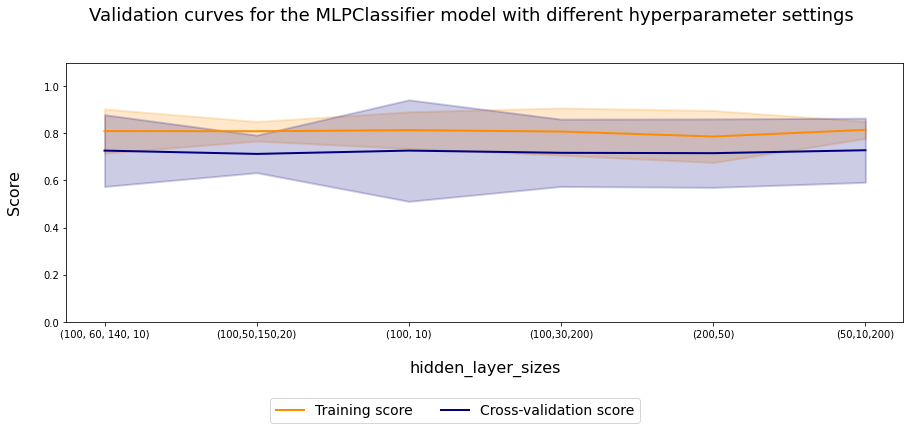

In [17]:
# Calculate the pooled standard deviation
def pooled_var(stds):
    # https://en.wikipedia.org/wiki/Pooled_variance#Pooled_standard_deviation
    n = 6 # size of each group
    return np.sqrt(sum((n-1)*(stds**2))/ len(stds)*(n-1))

# Set the parameters that the grid search has optimized
grid_params = {
    'hidden_layer_sizes':  ['(100, 60, 140, 10)', '(100,50,150,20)', '(100, 10)', '(100,30,200)', '(200,50)', '(50,10,200)']
}
# Set the results that are used to plot the validation curves
results = ['mean_test_score',
           'mean_train_score',
           'std_test_score', 
           'std_train_score']
# Plot the validation curves
fig, axes = plt.subplots(1, len(grid_params), 
                         figsize = (15, 6),
                         sharey='row')
axes.set_ylabel("Score\n", fontsize=16)
for idx, (param_name, param_range) in enumerate(grid_params.items()):
    grouped_df = df.groupby(f'param_{param_name}')[results]\
        .agg({'mean_train_score': 'mean',
              'mean_test_score': 'mean',
              'std_train_score': pooled_var,
              'std_test_score': pooled_var})

    previous_group = df.groupby(f'param_{param_name}')[results]
    axes.set_xlabel("\n" + param_name, fontsize=16)
    axes.set_ylim(0.0, 1.1)
    lw = 2
    axes.plot(param_range, grouped_df['mean_train_score'], label="Training score",
                color="darkorange", lw=lw)
    axes.fill_between(param_range,grouped_df['mean_train_score'] - grouped_df['std_train_score'],
                    grouped_df['mean_train_score'] + grouped_df['std_train_score'], alpha=0.2,
                    color="darkorange", lw=lw)
    axes.plot(param_range, grouped_df['mean_test_score'], label="Cross-validation score",
                color="navy", lw=lw)
    axes.fill_between(param_range, grouped_df['mean_test_score'] - grouped_df['std_test_score'],
                    grouped_df['mean_test_score'] + grouped_df['std_test_score'], alpha=0.2,
                    color="navy", lw=lw)

handles, labels = axes.get_legend_handles_labels()
fig.suptitle('Validation curves for the MLPClassifier model with different hyperparameter settings', fontsize=18)
fig.legend(handles, labels, loc=8, ncol=2, fontsize=14)
fig.subplots_adjust(bottom=0.25, top=0.85)  
plt.show()

**Start Of The Model M2 Initializations**

c:\Users\taher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.785


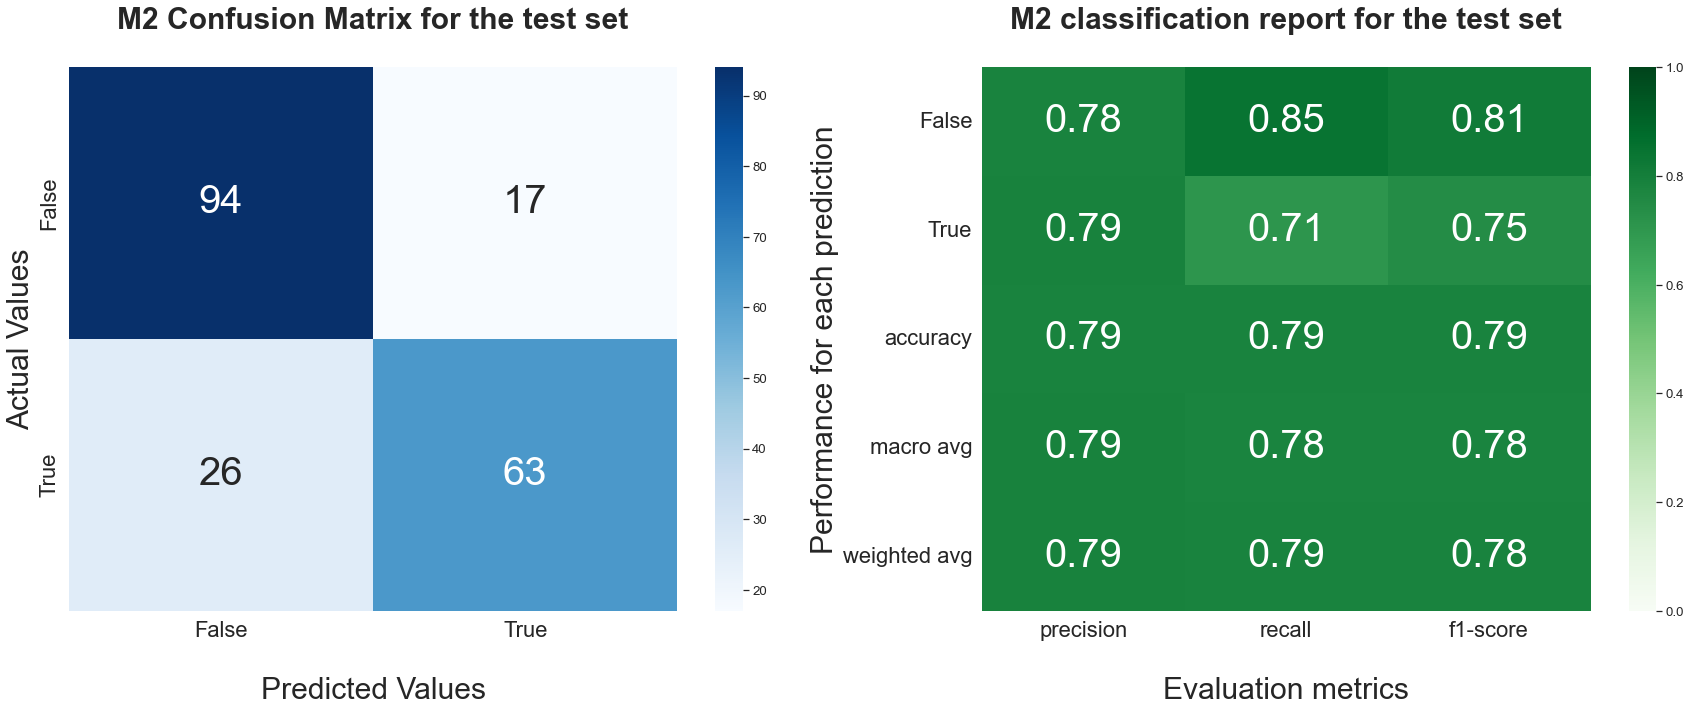

In [21]:
# Initialize M2 (MLPClassifier) with its hyperparameter settings.
MLP_classifier = MLPClassifier(hidden_layer_sizes=(100, 50, 150, 20), max_iter=500, early_stopping=True, solver ='lbfgs', activation='relu', alpha=0.01)
# Fit the training dataset onto M2 (train the model).
MLP_classifier.fit(x_train, y_train)
# Use the model M2 to make predictions for the test set. 
# Note: We probably also need to add the validation set somwhere for-
# the hyperparameter optimization step
MLPC_prediction = MLP_classifier.predict(x_test)
# Print the accuracy score of M2 on the test set 
print(MLP_classifier.score(x_test, y_test))
# Compute the Confusion Matrix of M2 on the test set 
cf_matrix = confusion_matrix(y_test,MLPC_prediction)
# Compute all evaluations on the metrics accuracy/percision/recall/f1-score of the performance of M2 on test set 
clf_report = classification_report(y_test,MLPC_prediction, output_dict=True, target_names=['False', 'True'])
score = clf_report['weighted avg']['f1-score']
sns.set(font_scale = 2)
# Display the visualization of the Confusion Matrix.
fig, ax = plt.subplots(1, 2, figsize=(30,10))
sns.set(font_scale = 1.2)
sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax[0], annot_kws={'fontsize': 40})
ax[0].set_title('M2 Confusion Matrix for the test set\n', fontsize= 30, fontweight='bold')
ax[0].set_xlabel('\nPredicted Values', fontsize= 30)
ax[0].set_ylabel('Actual Values', fontsize= 30)
ax[0].xaxis.set_ticklabels(['False','True'])
ax[0].yaxis.set_ticklabels(['False','True'])
# Display the visualization of the Classification Report.
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, cmap='Greens', annot=True, vmin=0, vmax=1, ax=ax[1], annot_kws={'fontsize': 40})
ax[1].set_title('M2 classification report for the test set\n', fontsize= 30, fontweight='bold')
ax[1].set_xlabel('\nEvaluation metrics', fontsize= 30)
ax[1].set_ylabel('Performance for each prediction', fontsize= 30)
plt.show()

Saving all the scores of the models on the validation set

In [55]:
# Initialize M2 (MLPClassifier) with its hyperparameter settings.
MLP_classifier1 = MLPClassifier(hidden_layer_sizes=(100,50,150,20), max_iter=500, early_stopping=True, solver ='lbfgs', activation='relu', alpha=0.01)
# Fit the training dataset onto M2 (train the model).
MLP_classifier1.fit(x_train1, y_train1)
# Use the model M2 to make predictions for the test set. 
# Note: We probably also need to add the validation set somwhere for-
# the hyperparameter optimization step
MLPC_prediction1 = MLP_classifier1.predict(x_val1)
# Print the accuracy score of M2 on the test set 
print(MLP_classifier1.score(x_val1, y_val1))
# Compute all evaluations on the metrics accuracy/percision/recall/f1-score of the performance of M2 on test set 
clf_report1 = classification_report(y_val1, MLPC_prediction1, output_dict=True, target_names=['False', 'True'])
score1 = clf_report1['weighted avg']['f1-score']
# Initialize M2 (MLPClassifier) with its hyperparameter settings.
MLP_classifier2 = MLPClassifier(hidden_layer_sizes=(100,50,150,20), max_iter=500, early_stopping=True, solver ='lbfgs', activation='relu', alpha=0.01)
# Fit the training dataset onto M2 (train the model).
MLP_classifier2.fit(x_train2, y_train2)
# Use the model M2 to make predictions for the test set. 
# Note: We probably also need to add the validation set somwhere for-
# the hyperparameter optimization step
MLPC_prediction2 = MLP_classifier2.predict(x_val2)
# Print the accuracy score of M2 on the test set 
print(MLP_classifier2.score(x_val2, y_val2))
# Compute all evaluations on the metrics accuracy/percision/recall/f1-score of the performance of M2 on test set 
clf_report2 = classification_report(y_val2, MLPC_prediction2, output_dict=True, target_names=['False', 'True'])
score2 = clf_report2['weighted avg']['f1-score']
# Initialize M2 (MLPClassifier) with its hyperparameter settings.
MLP_classifier3 = MLPClassifier(hidden_layer_sizes=(100,50,150,20), max_iter=500, early_stopping=True, solver ='lbfgs', activation='relu', alpha=0.01)
# Fit the training dataset onto M2 (train the model).
MLP_classifier3.fit(x_train3, y_train3)
# Use the model M2 to make predictions for the test set. 
# Note: We probably also need to add the validation set somwhere for-
# the hyperparameter optimization step
MLPC_prediction3 = MLP_classifier3.predict(x_val3)
# Print the accuracy score of M2 on the test set 
print(MLP_classifier3.score(x_val3, y_val3))
# Compute all evaluations on the metrics accuracy/percision/recall/f1-score of the performance of M2 on test set 
clf_report3 = classification_report(y_val2, MLPC_prediction3, output_dict=True, target_names=['False', 'True'])
score3 = clf_report3['weighted avg']['f1-score']
from tabulate import tabulate
# assign data
mydata = [
    ["M2 with 3 indicator", score3],
    ["M2 with 4 indicator", score2],
    ["M2 with 5 indicator", score1],
    ["M2 with 6 indicator", score],
]
 # create header
head = ["Model", "F1-Score"]
# display table
table = tabulate(mydata, headers=head, tablefmt="grid")
print(table)
mydata_dict = {
    "M2 with 3 indicator": score3,
    "M2 with 4 indicator": score2,
    "M2 with 5 indicator": score1,
    "M2 with 6 indicator": score,
}
table_df = pd.DataFrame(list(mydata_dict.items()),columns = ['Model', 'F1-Score']) 
table_df.to_csv("Table_df.csv")

0.71875


c:\Users\taher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Save the results for the M2 in a CSV

In [88]:
M2_val_results_dict = {'Id':test_set['Id'],
                        'M2 Prediction': MLP_classifier.predict(x_test),
                        'Actual Hiring Decision': y_test}
M2_val_results_df = pd.DataFrame(M2_val_results_dict) 
M2_val_results_df.to_csv("M2_val_results_df.csv")

**Start Of Testing SubGroups For Indicator = gender**

In [33]:
import random
genders = ['male', 'female', 'other']
nationalities = ['Dutch', 'German', 'Belgian']
# Subgroup of Ducth Male Individuals
are_male = test_set['gender'] == 'male'
are_male_df = test_set[are_male]
are_male_Dutch = are_male_df['nationality']=='Dutch'
are_male_Dutch_df = are_male_df[are_male_Dutch]
are_male_Dutch_x_test = are_male_Dutch_df.loc[:, ["master","phd","bachelor", 'ind-international_exp', 'ind-university_grade', 'ind-languages', 'ind-debateclub','ind-entrepeneur_exp']]
are_male_Dutch_y_test = are_male_Dutch_df["decision"]
are_male_Dutch_prediction = MLP_classifier.predict(are_male_Dutch_x_test)
are_male_Dutch_cf_matrix = confusion_matrix(are_male_Dutch_y_test,are_male_Dutch_prediction)
are_male_Dutch_clf_report = classification_report(are_male_Dutch_y_test,are_male_Dutch_prediction, output_dict=True, target_names=['False', 'True'])
# Subgroup of German Male Individuals
are_male = test_set['gender'] == 'male'
are_male_df = test_set[are_male]
are_male_German = are_male_df['nationality']=='German'
are_male_German_df = are_male_df[are_male_German]
are_male_German_x_test = are_male_German_df.loc[:, ["master","phd","bachelor", 'ind-international_exp', 'ind-university_grade', 'ind-languages', 'ind-debateclub','ind-entrepeneur_exp']]
are_male_German_y_test = are_male_German_df["decision"]
are_male_German_prediction = MLP_classifier.predict(are_male_German_x_test)
are_male_German_cf_matrix = confusion_matrix(are_male_German_y_test,are_male_German_prediction)
are_male_German_clf_report = classification_report(are_male_German_y_test,are_male_German_prediction, output_dict=True, target_names=['False', 'True'])
# Subgroup of Belgian Male Individuals
are_male = test_set['gender'] == 'male'
are_male_df = test_set[are_male]
are_male_Belgian = are_male_df['nationality']=='Belgian'
are_male_Belgian_df = are_male_df[are_male_Belgian]
are_male_Belgian_x_test = are_male_Belgian_df.loc[:, ["master","phd","bachelor", 'ind-international_exp', 'ind-university_grade', 'ind-languages', 'ind-debateclub','ind-entrepeneur_exp']]
are_male_Belgian_y_test = are_male_Belgian_df["decision"]
are_male_Belgian_prediction = MLP_classifier.predict(are_male_Belgian_x_test)
are_male_Belgian_cf_matrix = confusion_matrix(are_male_Belgian_y_test,are_male_Belgian_prediction)
are_male_Belgian_clf_report = classification_report(are_male_Belgian_y_test,are_male_Belgian_prediction, output_dict=True, target_names=['False', 'True'])
# Subgroup of Ducth Female Individuals
are_female = test_set['gender'] == 'female'
are_female_df = test_set[are_female]
are_female_Dutch = are_female_df['nationality']=='Dutch'
are_female_Dutch_df = are_female_df[are_female_Dutch]
are_female_Dutch_x_test = are_female_Dutch_df.loc[:, ["master","phd","bachelor", 'ind-international_exp', 'ind-university_grade', 'ind-languages', 'ind-debateclub','ind-entrepeneur_exp']]
are_female_Dutch_y_test = are_female_Dutch_df["decision"]
are_female_Dutch_prediction = MLP_classifier.predict(are_female_Dutch_x_test)
are_female_Dutch_cf_matrix = confusion_matrix(are_female_Dutch_y_test,are_female_Dutch_prediction)
are_female_Dutch_clf_report = classification_report(are_female_Dutch_y_test,are_female_Dutch_prediction, output_dict=True, target_names=['False', 'True'])
# Subgroup of German Female Individuals
are_female = test_set['gender'] == 'female'
are_female_df = test_set[are_female]
are_female_German = are_female_df['nationality']=='German'
are_female_German_df = are_female_df[are_female_German]
are_female_German_x_test = are_female_German_df.loc[:, ["master","phd","bachelor", 'ind-international_exp', 'ind-university_grade', 'ind-languages', 'ind-debateclub','ind-entrepeneur_exp']]
are_female_German_y_test = are_female_German_df["decision"]
are_female_German_prediction = MLP_classifier.predict(are_female_German_x_test)
are_female_German_cf_matrix = confusion_matrix(are_female_German_y_test,are_female_German_prediction)
are_female_German_clf_report = classification_report(are_female_German_y_test,are_female_German_prediction, output_dict=True, target_names=['False', 'True'])
# Subgroup of Belgian Female Individuals
are_female = test_set['gender'] == 'female'
are_female_df = test_set[are_female]
are_female_Belgian = are_female_df['nationality']=='Belgian'
are_female_Belgian_df = are_female_df[are_female_Belgian]
are_female_Belgian_x_test = are_female_Belgian_df.loc[:, ["master","phd","bachelor", 'ind-international_exp', 'ind-university_grade', 'ind-languages', 'ind-debateclub','ind-entrepeneur_exp']]
are_female_Belgian_y_test = are_female_Belgian_df["decision"]
are_female_Belgian_prediction = MLP_classifier.predict(are_female_Belgian_x_test)
are_female_Belgian_cf_matrix = confusion_matrix(are_female_Belgian_y_test,are_female_Belgian_prediction)
are_female_Belgian_clf_report = classification_report(are_female_Belgian_y_test,are_female_Belgian_prediction, output_dict=True, target_names=['False', 'True'])
# Subgroup of Dutch Other Individuals
are_other = test_set['gender'] == 'other'
are_other_df = test_set[are_other]
are_other_Dutch = are_other_df['nationality']=='Dutch'
are_other_Dutch_df = are_other_df[are_other_Dutch]
are_other_Dutch_x_test = are_other_Dutch_df.loc[:, ["master","phd","bachelor", 'ind-international_exp', 'ind-university_grade', 'ind-languages', 'ind-debateclub','ind-entrepeneur_exp']]
are_other_Dutch_y_test = are_other_Dutch_df["decision"]
are_other_Dutch_prediction = MLP_classifier.predict(are_other_Dutch_x_test)
are_other_Dutch_cf_matrix = confusion_matrix(are_other_Dutch_y_test,are_other_Dutch_prediction)
are_other_Dutch_clf_report = classification_report(are_other_Dutch_y_test,are_other_Dutch_prediction, output_dict=True, target_names=['False', 'True'])
# Subgroup of German Other Individuals
are_other = test_set['gender'] == 'other'
are_other_df = test_set[are_other]
are_other_German = are_other_df['nationality']=='German'
are_other_German_df = are_other_df[are_other_German]
are_other_German_x_test = are_other_German_df.loc[:, ["master","phd","bachelor", 'ind-international_exp', 'ind-university_grade', 'ind-languages', 'ind-debateclub','ind-entrepeneur_exp']]
are_other_German_y_test = are_other_German_df["decision"]
are_other_German_prediction = MLP_classifier.predict(are_other_German_x_test)
are_other_German_cf_matrix = confusion_matrix(are_other_German_y_test,are_other_German_prediction)
are_other_German_clf_report = classification_report(are_other_German_y_test,are_other_German_prediction, output_dict=True, target_names=['False'])
# Subgroup of Belgian Other Individuals
are_other = test_set['gender'] == 'other'
are_other_df = test_set[are_other]
are_other_Belgian = are_other_df['nationality']=='Belgian'
are_other_Belgian_df = are_other_df[are_other_Belgian]
are_other_Belgian_x_test = are_other_Belgian_df.loc[:, ["master","phd","bachelor", 'ind-international_exp', 'ind-university_grade', 'ind-languages', 'ind-debateclub','ind-entrepeneur_exp']]
are_other_Belgian_y_test = are_other_Belgian_df["decision"]
are_other_Belgian_prediction = MLP_classifier.predict(are_other_Belgian_x_test)
are_other_Belgian_cf_matrix = confusion_matrix(are_other_Belgian_y_test, are_other_Belgian_prediction)
are_other_Belgian_clf_report = classification_report(are_other_Belgian_y_test,are_other_Belgian_prediction, output_dict=True, target_names=['False'])

c:\Users\taher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\taher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\taher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Male Individuals

In [34]:
# Only pick the subgroup of male individuals
are_male = test_set['gender'] == 'male'
df_A_Males = test_set[are_male]
print(len(df_A_Males))
# Use the test set for the male subgroup
males_x_test = df_A_Males.loc[:, ["master","phd","bachelor", 'ind-international_exp', 'ind-university_grade', 'ind-languages', 'ind-debateclub','ind-entrepeneur_exp']]
males_y_test = df_A_Males["decision"]
# Use the model M2 to make predictions for the test set. 
males_MLPC_prediction = MLP_classifier.predict(males_x_test)
# Print the accuracy score of M2 on the test set 
print(MLP_classifier.score(males_x_test, males_y_test))
# Compute all evaluations on the metrics accuracy/percision/recall/f1-score of the performance of M2 on test set 
males_clf_report = classification_report(males_y_test,males_MLPC_prediction, output_dict=True, target_names=['False', 'True'])
# Compute the Confusion Matrix of the performance of M2 on test set 
males_cf_matrix = confusion_matrix(males_y_test, males_MLPC_prediction)

112
0.8125


Female Individuals

In [35]:
# Only pick the subgroup of male individuals
are_female = test_set['gender'] == 'female'
df_A_Females = test_set[are_female]
print(len(df_A_Females))
# Use the test set for the female subgroup
females_x_test = df_A_Females.loc[:, ["master","phd","bachelor", 'ind-international_exp', 'ind-university_grade', 'ind-languages', 'ind-debateclub','ind-entrepeneur_exp']]
females_y_test = df_A_Females["decision"]
# Use the model M2 to make predictions for the test set. 
# Note: We probably also need to add the validation set somwhere for-
# the hyperparameter optimization step
females_MLPC_prediction = MLP_classifier.predict(females_x_test)
# Print the accuracy score of M2 on the test set 
print(MLP_classifier.score(females_x_test, females_y_test))
# Compute the confusion matrixs of the performance of M2 on test set 
females_cf_matrix = confusion_matrix(females_y_test,females_MLPC_prediction)
# Compute all evaluations on the metrics accuracy/percision/recall/f1-score of the performance of M2 on test set 
females_clf_report = classification_report(females_y_test, females_MLPC_prediction, output_dict=True, target_names=['False', 'True'])

81
0.7777777777777778


Other Individuals

In [36]:
# Only pick the subgroup of other individuals
are_other = test_set['gender'] == 'other'
df_A_Others = test_set[are_other]
print(len(df_A_Others))
# Use the test set for the other subgroup
others_x_test = df_A_Others.loc[:, ["master","phd","bachelor", 'ind-international_exp', 'ind-university_grade', 'ind-languages', 'ind-debateclub','ind-entrepeneur_exp']]
others_y_test = df_A_Others["decision"]
# Use the model M2 to make predictions for the test set. 
# Note: We probably also need to add the validation set somwhere for-
# the hyperparameter optimization step
others_MLPC_prediction = MLP_classifier.predict(others_x_test)
# Print the accuracy score of M2 on the test set 
print(MLP_classifier.score(others_x_test, others_y_test))
# Compute all evaluations on the metrics accuracy/percision/recall/f1-score of the performance of M2 on test set 
others_clf_report = classification_report(others_y_test, others_MLPC_prediction, output_dict=True, target_names=['False', 'True'])
# Compute the confusion matrixs of the performance of M2 on test set 
others_cf_matrix = confusion_matrix(others_y_test, others_MLPC_prediction)

7
0.7142857142857143


**Start Of Testing SubGroups For Indicator = nationality**

Dutch Individuals

In [37]:
# Only pick the subgroup of dutch individuals
are_dutch = test_set['nationality'] == 'Dutch'
df_A_Dutch = test_set[are_dutch]
print(len(df_A_Dutch))
# Use the test set for the dutch subgroup
dutch_x_test = df_A_Dutch.loc[:, ["master","phd","bachelor", 'ind-international_exp', 'ind-university_grade', 'ind-languages', 'ind-debateclub','ind-entrepeneur_exp']]
dutch_y_test = df_A_Dutch["decision"]
# Use the model M2 to make predictions for the test set. 
# Note: We probably also need to add the validation set somwhere for-
# the hyperparameter optimization step
dutch_MLPC_prediction = MLP_classifier.predict(dutch_x_test)
# Print the accuracy score of M2 on the test set 
print(MLP_classifier.score(dutch_x_test, dutch_y_test))
# Compute all evaluations on the metrics accuracy/percision/recall/f1-score of the performance of M2 on test set 
dutch_clf_report = classification_report(dutch_y_test, dutch_MLPC_prediction, output_dict=True, target_names=['False', 'True'])
# Compute the confusion matrixs of the performance of M2 on test set 
dutch_cf_matrix = confusion_matrix(dutch_y_test, dutch_MLPC_prediction)

151
0.7748344370860927


German Individuals

In [38]:
# Only pick the subgroup of german individuals
are_german = test_set['nationality'] == 'German'
df_A_German = test_set[are_german]
print(len(df_A_German))
# Use the test set for the german subgroup
german_x_test = df_A_German.loc[:, ["master","phd","bachelor", 'ind-international_exp', 'ind-university_grade', 'ind-languages', 'ind-debateclub','ind-entrepeneur_exp']]
german_y_test = df_A_German["decision"]
# Use the model M2 to make predictions for the test set. 
# Note: We probably also need to add the validation set somwhere for-
# the hyperparameter optimization step
german_MLPC_prediction = MLP_classifier.predict(german_x_test)
# Print the accuracy score of M2 on the test set 
print(MLP_classifier.score(german_x_test, german_y_test))
# Compute all evaluations on the metrics accuracy/percision/recall/f1-score of the performance of M2 on test set 
german_clf_report = classification_report(german_y_test, german_MLPC_prediction, output_dict=True, target_names=['False', 'True'])
# Compute the confusion matrixs of the performance of M2 on test set 
german_cf_matrix = confusion_matrix(german_y_test, german_MLPC_prediction)

26
0.8461538461538461


Belgian Individuals

In [39]:
# Only pick the subgroup of belgian individuals
are_belgian = test_set['nationality'] == 'Belgian'
df_A_Belgian = test_set[are_belgian]
print(len(df_A_Belgian))
# Use the test set for the belgian subgroup
belgian_x_test = df_A_Belgian.loc[:, ["master","phd","bachelor", 'ind-international_exp', 'ind-university_grade', 'ind-languages', 'ind-debateclub','ind-entrepeneur_exp']]
belgian_y_test= df_A_Belgian["decision"]
# Use the model M2 to make predictions for the test set. 
# Note: We probably also need to add the validation set somwhere for-
# the hyperparameter optimization step
belgian_MLPC_prediction = MLP_classifier.predict(belgian_x_test)
# Print the accuracy score of M2 on the test set 
print(MLP_classifier.score(belgian_x_test, belgian_y_test))
# Compute all evaluations on the metrics accuracy/percision/recall/f1-score of the performance of M2 on test set 
belgian_clf_report = classification_report(belgian_y_test, belgian_MLPC_prediction, output_dict=True, target_names=['False', 'True'])
# Compute the confusion matrixs of the performance of M2 on test set 
belgian_cf_matrix = confusion_matrix(belgian_y_test, belgian_MLPC_prediction)

23
0.8695652173913043


Text(0.5, 1.0, '\n\nSubgroup Of Belgian Individuals\n')

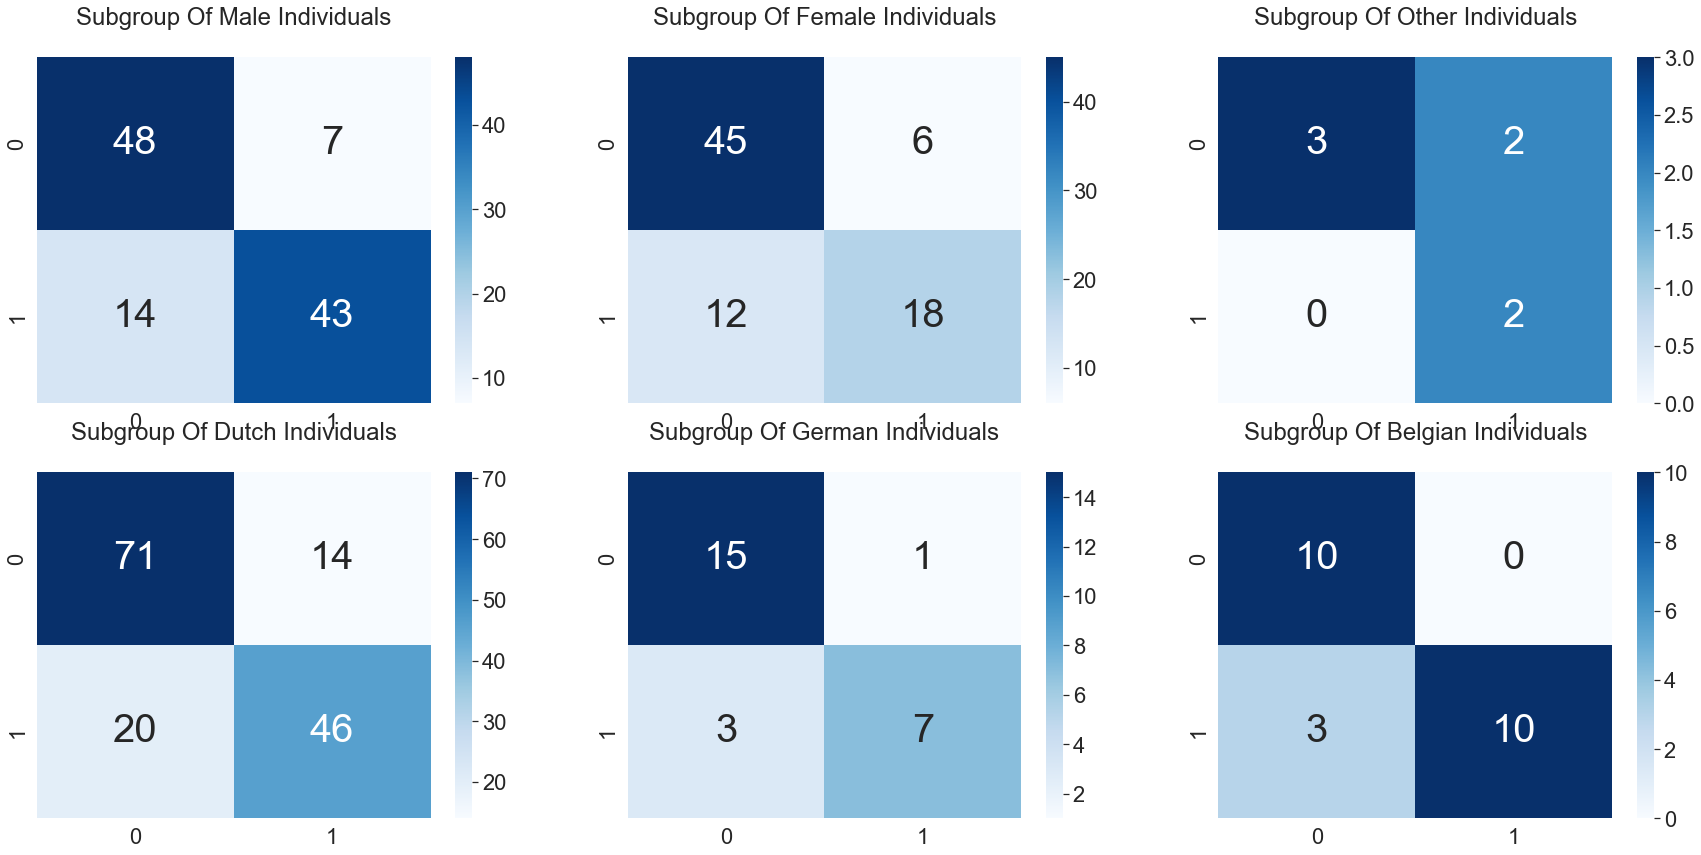

In [90]:
fig, ax = plt.subplots(2, 3, figsize=(30,14))
sns.heatmap(males_cf_matrix, annot=True, cmap='Blues', ax=ax[0, 0], annot_kws={'fontsize': 40})
ax[0, 0].set_title('Subgroup Of Male Individuals\n')
# Display the visualization of the Classification Report.
sns.heatmap(females_cf_matrix, annot=True, cmap='Blues', ax=ax[0, 1], annot_kws={'fontsize': 40})
ax[0, 1].set_title('Subgroup Of Female Individuals\n')
# Display the visualization of the Classification Report.
sns.heatmap(others_cf_matrix, annot=True, cmap='Blues', ax=ax[0, 2], annot_kws={'fontsize': 40})
ax[0, 2].set_title('Subgroup Of Other Individuals\n')
# Display the visualization of the Classification Report.
sns.heatmap(dutch_cf_matrix, annot=True, cmap='Blues', ax=ax[1, 0], annot_kws={'fontsize': 40})
ax[1, 0].set_title('\n\nSubgroup Of Dutch Individuals\n')
# Display the visualization of the Classification Report.
sns.heatmap(german_cf_matrix, annot=True, cmap='Blues', ax=ax[1, 1], annot_kws={'fontsize': 40})
ax[1, 1].set_title('\n\nSubgroup Of German Individuals\n')
# Display the visualization of the Classification Report.
sns.heatmap(belgian_cf_matrix, annot=True, cmap='Blues', ax=ax[1, 2], annot_kws={'fontsize': 40})
ax[1, 2].set_title('\n\nSubgroup Of Belgian Individuals\n')


Text(0.5, 1.0, 'Subgroup Of Belgian Individuals\n')

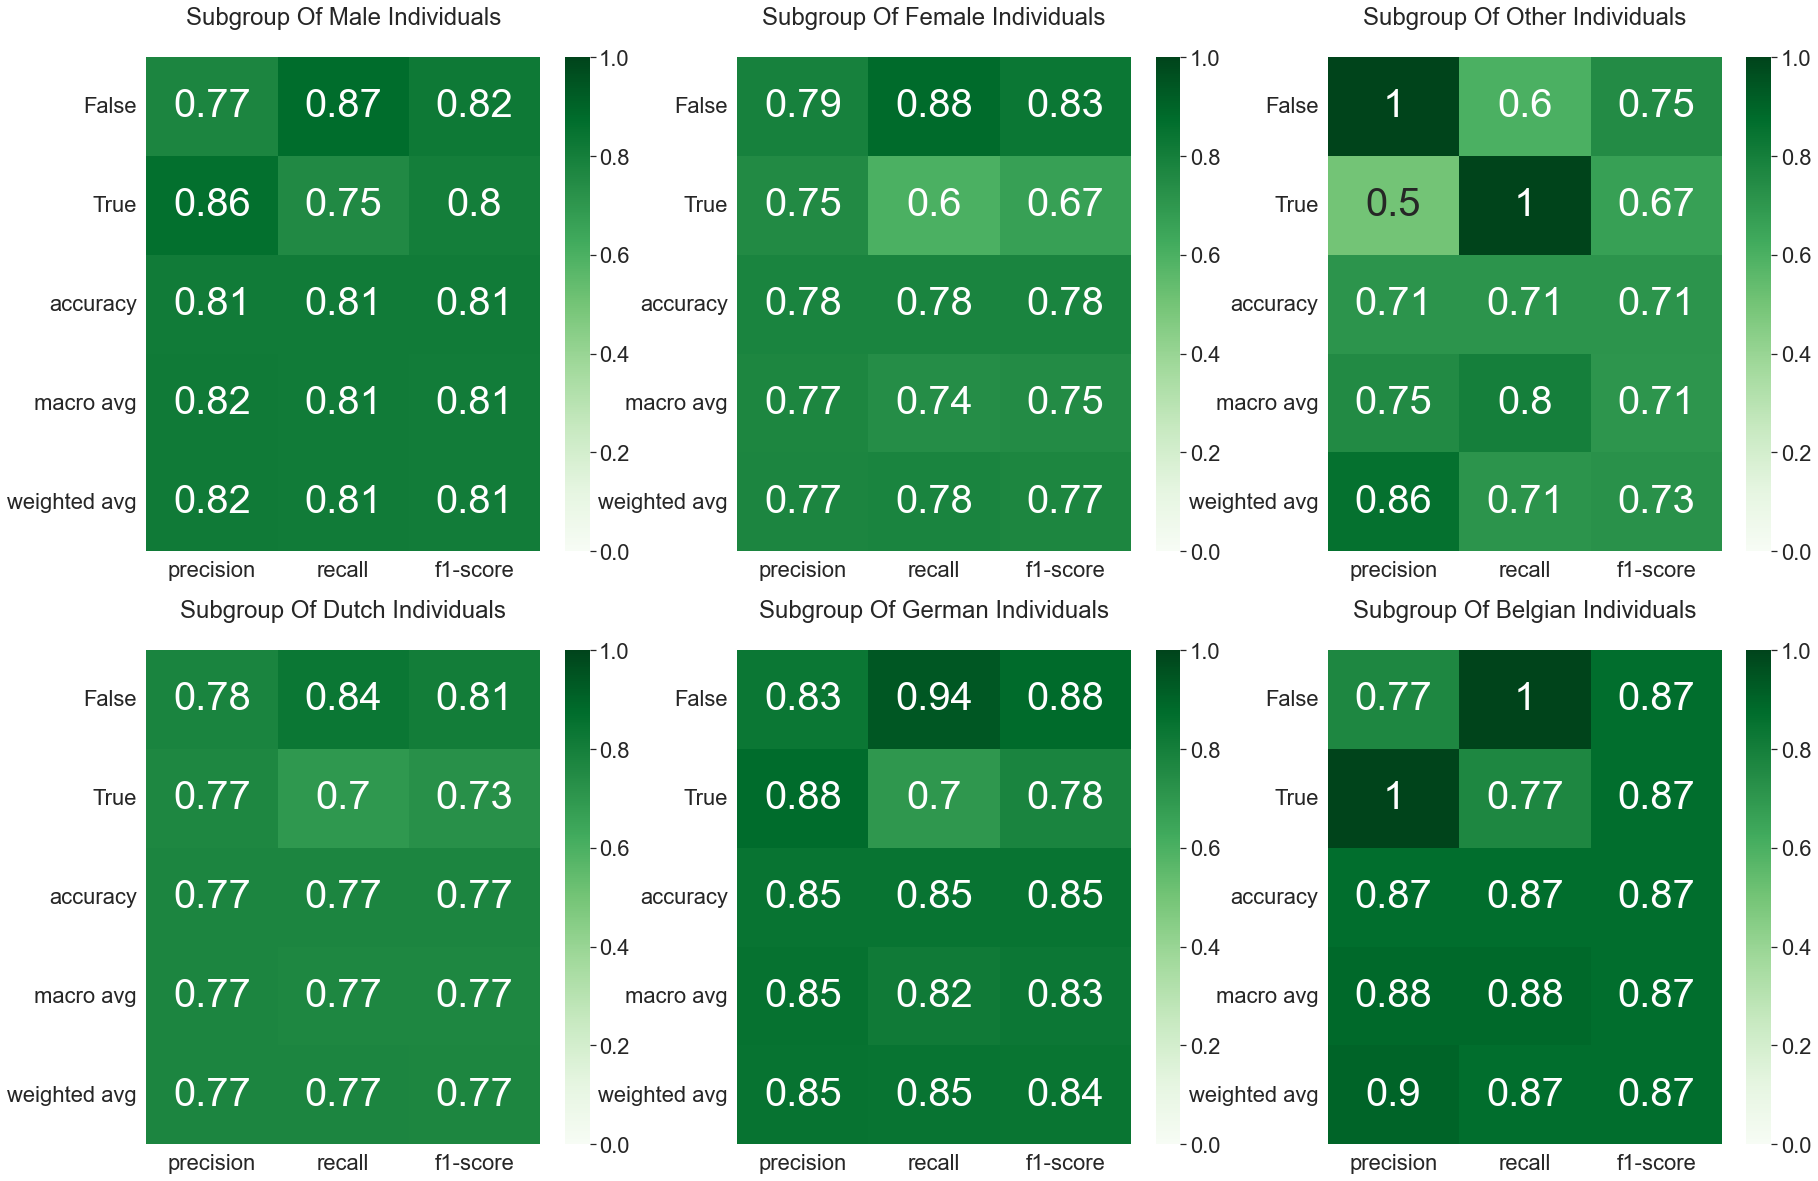

In [50]:
fig, ax = plt.subplots(2, 3, figsize=(30,20))
sns.heatmap(pd.DataFrame(males_clf_report).iloc[:-1, :].T, cmap='Greens', annot=True, vmin=0, vmax=1, ax=ax[0, 0], annot_kws={'fontsize': 40})
ax[0, 0].set_title('Subgroup Of Male Individuals\n')
# Display the visualization of the Classification Report.
sns.heatmap(pd.DataFrame(females_clf_report).iloc[:-1, :].T, cmap='Greens', annot=True, vmin=0, vmax=1, ax=ax[0, 1], annot_kws={'fontsize': 40})
ax[0, 1].set_title('Subgroup Of Female Individuals\n')
# Display the visualization of the Classification Report.
sns.heatmap(pd.DataFrame(others_clf_report).iloc[:-1, :].T, cmap='Greens', annot=True, vmin=0, vmax=1, ax=ax[0, 2], annot_kws={'fontsize': 40})
ax[0, 2].set_title('Subgroup Of Other Individuals\n')
# Display the visualization of the Classification Report.
sns.heatmap(pd.DataFrame(dutch_clf_report).iloc[:-1, :].T, cmap='Greens', annot=True, vmin=0, vmax=1, ax=ax[1, 0], annot_kws={'fontsize': 40})
ax[1, 0].set_title('Subgroup Of Dutch Individuals\n')
# Display the visualization of the Classification Report.
sns.heatmap(pd.DataFrame(german_clf_report).iloc[:-1, :].T, cmap='Greens', annot=True, vmin=0, vmax=1, ax=ax[1, 1], annot_kws={'fontsize': 40})
ax[1, 1].set_title('Subgroup Of German Individuals\n')
# Display the visualization of the Classification Report.
sns.heatmap(pd.DataFrame(belgian_clf_report).iloc[:-1, :].T, cmap='Greens', annot=True, vmin=0, vmax=1, ax=ax[1, 2], annot_kws={'fontsize': 40})
ax[1, 2].set_title('Subgroup Of Belgian Individuals\n')

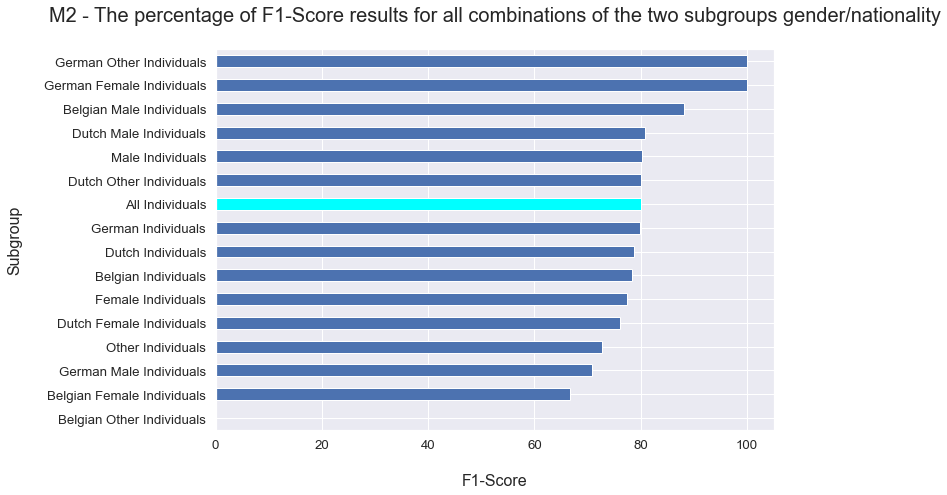

In [81]:
# Create new dictionary for all the results of combinations for the two subgroups gender/nationality
sub_dict ={}

sub_dict['All Individuals'] = 0.8 * 100
sub_dict['Male Individuals'] = males_clf_report['weighted avg']['f1-score'] * 100
sub_dict['Female Individuals'] = females_clf_report['weighted avg']['f1-score'] * 100
sub_dict['Other Individuals'] = others_clf_report['weighted avg']['f1-score'] * 100
sub_dict['Dutch Individuals'] = dutch_clf_report['weighted avg']['f1-score'] * 100
sub_dict['German Individuals'] = german_clf_report['weighted avg']['f1-score'] * 100
sub_dict['Belgian Individuals'] = belgian_clf_report['weighted avg']['f1-score'] * 100
sub_dict['Dutch Male Individuals'] = are_male_Dutch_clf_report['weighted avg']['f1-score'] * 100
sub_dict['German Male Individuals'] = are_male_German_clf_report['weighted avg']['f1-score'] * 100
sub_dict['Belgian Male Individuals'] = are_male_Belgian_clf_report['weighted avg']['f1-score'] * 100
sub_dict['Dutch Female Individuals'] = are_female_Dutch_clf_report['weighted avg']['f1-score'] * 100
sub_dict['German Female Individuals'] = are_female_German_clf_report['weighted avg']['f1-score'] * 100
sub_dict['Belgian Female Individuals'] = are_female_Belgian_clf_report['weighted avg']['f1-score'] * 100
sub_dict['Dutch Other Individuals'] = are_other_Dutch_clf_report['weighted avg']['f1-score'] * 100
sub_dict['German Other Individuals'] = are_other_German_clf_report['weighted avg']['f1-score'] * 100
sub_dict['Belgian Other Individuals'] = are_other_Belgian_clf_report['weighted avg']['f1-score'] * 100
# Create a dataframe from the dictionary
sub_df = pd.DataFrame(list(sub_dict.items()),columns = ['Subgroup', 'F1-Score']) 
# Sort the values based on their F1-scores
sub_df.sort_values('F1-Score',inplace=True)
# Plot a horizontal bar chart to better show the subgroups who are at a disadvantage
cls=['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'cyan', 'b', 'b', 'b', 'b', 'b', 'b']
ax = sub_df.plot.barh(x='Subgroup', y='F1-Score', figsize=(10,7), color=cls)
ax.set_title('M2 - The percentage of F1-Score results for all combinations of the two subgroups gender/nationality\n', fontsize= 20)
ax.set_ylabel('Subgroup\n', fontsize= 16)
ax.set_xlabel('\nF1-Score', fontsize= 16)
ax.get_legend().remove()